<a href="https://colab.research.google.com/github/akarshsnair/Realtime-Saslary-Prediction/blob/main/ML%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/survey_results_public.csv")

In [109]:
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,61878.000000,3.290900e+04,0.0,0.0,31163.000000,3.268200e+04
mean,30939.500000,2.734845e+52,NaN,NaN,10.197253,1.690877e+05
std,17862.784315,4.961182e+54,NaN,NaN,8.629463,7.472428e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,15470.250000,3.000000e+04,NaN,NaN,4.000000,3.600000e+04
50%,30939.500000,7.700000e+04,NaN,NaN,8.000000,6.805600e+04
75%,46408.750000,1.530000e+05,NaN,NaN,15.000000,1.200000e+05
max,61878.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      61878 non-null  int64  
 1   MainBranch                      61878 non-null  object 
 2   Employment                      60790 non-null  object 
 3   RemoteWork                      50177 non-null  object 
 4   CodingActivities                50134 non-null  object 
 5   EdLevel                         60679 non-null  object 
 6   LearnCode                       60684 non-null  object 
 7   LearnCodeOnline                 42997 non-null  object 
 8   LearnCodeCoursesCert            24827 non-null  object 
 9   YearsCode                       60486 non-null  object 
 10  YearsCodePro                    44171 non-null  object 
 11  DevType                         52154 non-null  object 
 12  OrgSize                         

In [111]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [112]:
#Here ConvertedCompYearly is the salary
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df[df["ConvertedCompYearly"].notnull()]
df.head()


,Country,EdLevel,YearsCodePro,Employment,ConvertedCompYearly
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [113]:
df = df.dropna()
df.isnull().sum()


Country                0
EdLevel                0
YearsCodePro           0
Employment             0
ConvertedCompYearly    0
dtype: int64

In [114]:
df['Country'].value_counts()

United States of America                                7473
Germany                                                 2495
United Kingdom of Great Britain and Northern Ireland    2262
India                                                   1807
Canada                                                  1250
                                                        ... 
Cape Verde                                                 1
Suriname                                                   1
Somalia                                                    1
Fiji                                                       1
Monaco                                                     1
Name: Country, Length: 157, dtype: int64

In [115]:

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [116]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   9589
United States of America                                7473
Germany                                                 2495
United Kingdom of Great Britain and Northern Ireland    2262
India                                                   1807
Canada                                                  1250
France                                                  1217
Brazil                                                  1088
Spain                                                    865
Poland                                                   832
Netherlands                                              777
Australia                                                708
Italy                                                    701
Sweden                                                   576
Russian Federation                                       459
Switzerland                                              456
Name: Country, dtype: in

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


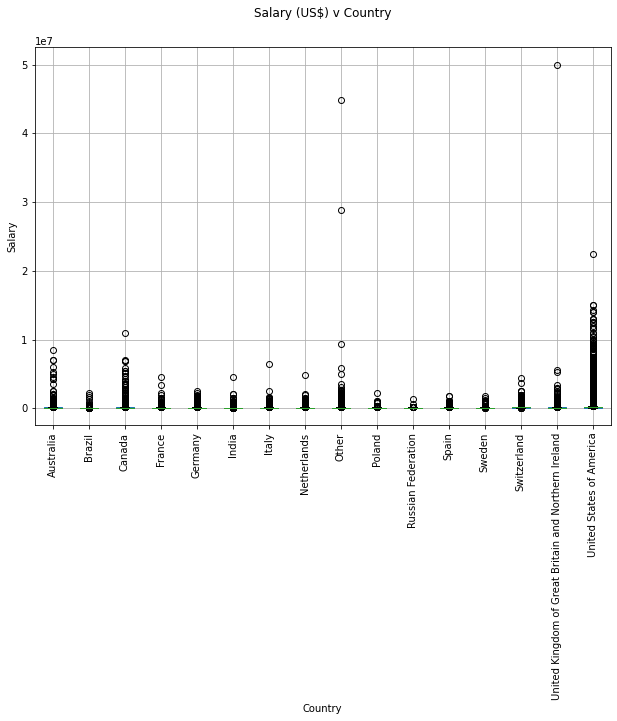

In [117]:
fig, ax = plt.subplots(1,1, figsize=(10, 7))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [118]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

KeyError: ignored